In [1]:
# Relevant Library
import os
import re
from datetime import datetime

# Numerical Data Process
import pandas as pd

# Visulize
import matplotlib.pyplot as plt

# Custom Library
from library.graph_data_extract import graph_data_extract

In [2]:
class CovidGraph():
    def __init__(self):
        self.df = graph_data_extract()
        self.cases = ['Confirmed', 'Recovered', 'Death']
        self.color = ['darkorange', 'limegreen', 'crimson']
        self.time = datetime.now().strftime("%d %b,%Y")
        self.font = 25
        os.makedirs('Images', exist_ok=True)

    def country_stat(self, country='Bangladesh', save=True, threshold=0):
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(111)
        plt.grid()

        flag = 1
        for k, i in enumerate(self.df):
            y_val = i.loc[country]
            total_len = len(y_val)
            if flag:
                y_val = y_val[y_val > threshold].values
                length = len(y_val)
                temp_len = total_len-length
                flag = 0
            else:
                y_val = y_val.values[temp_len:]
            plt.plot(range(length), y_val, linewidth=5,
                     label='{}'.format(self.cases[k]), color=self.color[k])
            plt.scatter(range(length), y_val, linewidth=5, color=self.color[k])

        plt.xlabel("Day", fontsize=self.font)
        plt.ylabel('Number of people', fontsize=self.font)
        plt.title('COVID-19 Cases in {} Untill {}'.format(country,
                                                          self.time), fontsize=self.font)
        ax.legend(fontsize=self.font, loc='upper left')

        if save:
            filename = '{} COVID-19 Graph.png'.format(country)
            filename = 'Images/' + \
                ' '.join(re.findall((r'[\w\-\s.]+'), filename))
            plt.savefig(filename)
        plt.show()

    def graph_comparision(self, case='Confirmed', country=['India', 'Pakistan'], save=True, threshold=0):
        index = self.cases.index(case)
        data = self.df[index]

        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(111)
        plt.grid()

        for i in country:
            y_val = data.loc[i]
            y_val = y_val[y_val > threshold].values
            length = len(y_val)
            plt.plot(range(length), y_val, linewidth=5,
                     label='{}'.format(i))
            plt.scatter(range(length), y_val, linewidth=5)
        plt.xlabel("Day Number", fontsize=self.font)
        plt.ylabel('{} Cases'.format(case), fontsize=self.font)
        plt.title('COVID-19 {} Cases Untill {}'.format(case,
                                                       self.time), fontsize=self.font)
        ax.legend(fontsize=self.font, loc='upper left')

        if save:
            filename = 'COVID-19 {} Cases Comparision Graph in {}.png'.format(
                case, ' '.join(country))
            filename = 'Images/' + \
                ' '.join(re.findall((r'[\w\-\s.]+'), filename))
            plt.savefig(filename)
        plt.show()

In [3]:
graph = CovidGraph()

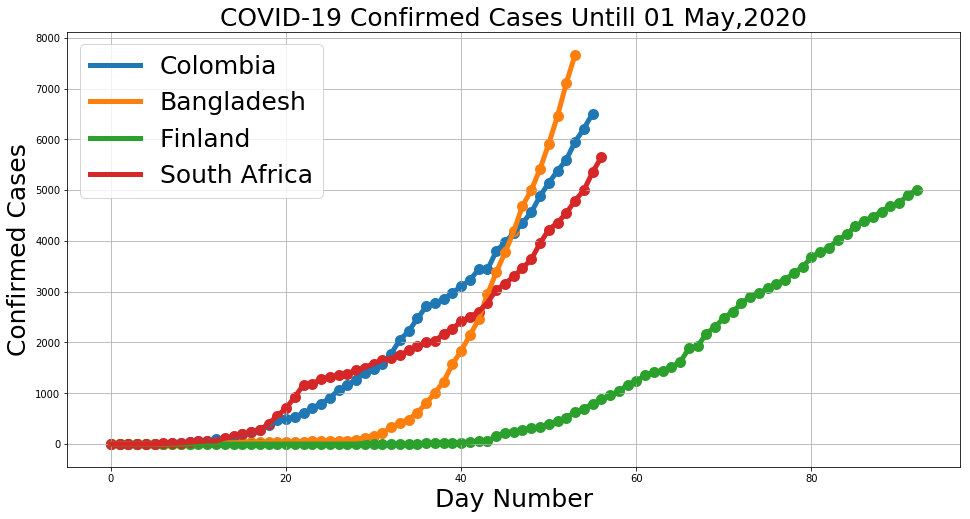

In [4]:
graph.graph_comparision('Confirmed', country=['Colombia','Bangladesh','Finland','South Africa'])

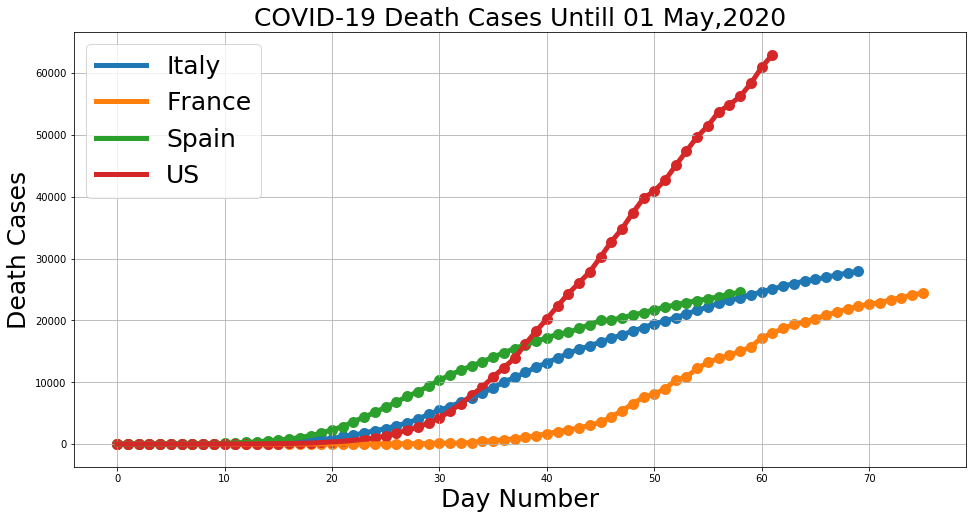

In [5]:
graph.graph_comparision('Death', country=['Italy','France','Spain', 'US'])

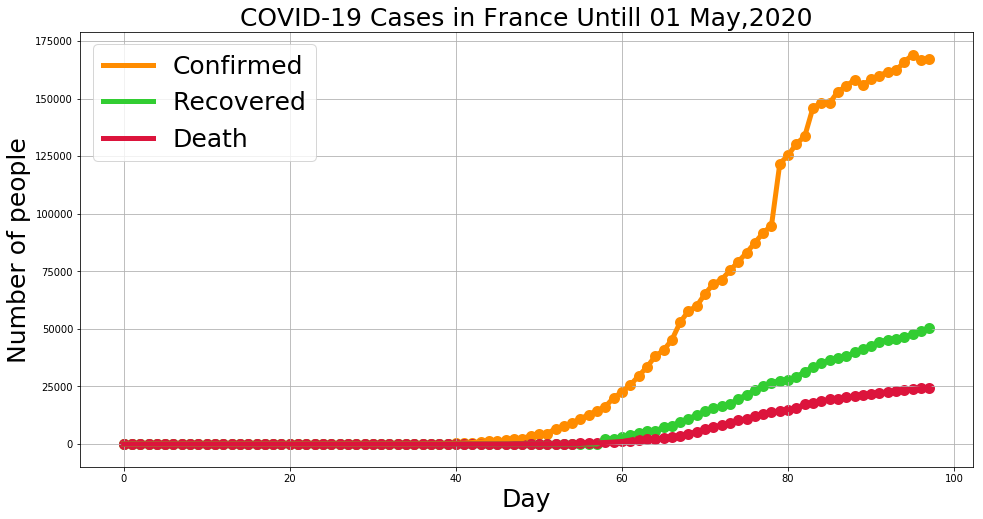

In [6]:
graph.country_stat('France')